In [1]:
import sys
sys.path.append('/home/cara/Documents/reddit_analysis_code')
import numpy as np
import pandas as pd
from reddit_dataclass import RedditData as reddit
import pickle
import matplotlib.pyplot as plt
import scipy.stats as scpstat
import matplotlib.dates as dates
import datetime

In [4]:
thread_info = pickle.load(open('thread_info.p', 'rb'))
thread_lvls_info = pickle.load(open('thread_lvls_info.p', 'rb'))
thread_data = pickle.load(open('clean_thread_data.p', 'rb'))

In [2]:
POST_TYPES = ['fail', 'success']
rename_names = {
    'fail': 'failed threads',
    'success': 'successful threads'
}

colours = {
    'fail': 'tab:blue',
    'success': 'tab:orange'
}

# Proportion of unsuccessful threads

In [23]:
thread_info['crypto']

,thread_id,thread_size,authors,level_mean,level_q1,level_median,level_q3,level_max
0,xsglev,2541,439,2.467139,2.0,2.0,3.0,12
1,xsgqgi,1,1,0.000000,0.0,0.0,0.0,0
2,xsgqkx,1,1,0.000000,0.0,0.0,0.0,0
3,xsgsb3,1,1,0.000000,0.0,0.0,0.0,0
4,xsgz7t,22,16,1.590909,1.0,1.0,2.0,4
...,...,...,...,...,...,...,...,...
14813,yhtvpj,1,1,0.000000,0.0,0.0,0.0,0
14814,yhu40u,1,1,0.000000,0.0,0.0,0.0,0
14815,yhu53f,1,1,0.000000,0.0,0.0,0.0,0
14816,yhu621,1,1,0.000000,0.0,0.0,0.0,0


In [6]:
failed_threads = {}
for key in thread_info:
    failed_threads[key] = thread_info[key].loc[thread_info[key].level_max == 0, :]
    print(f"{key}: {len(failed_threads[key])/len(thread_info[key])*100: .2f}% of posts garner no comments")

books:  67.40% of posts garner no comments
conspiracy:  15.09% of posts garner no comments
crypto:  54.31% of posts garner no comments
thedonald:  66.40% of posts garner no comments


In [27]:
for key in thread_info:
    print(f"{key}   {len(thread_info[key])}  {len(failed_threads[key])}")

books   4776  3219
conspiracy   11395  1720
crypto   14818  8048
thedonald   491  326


# Sentiment distribution of failed vs successful threads

In [7]:
posts = {}

for key in thread_data:
    thread_posts = {}
    thread_posts['all'] = thread_data[key].loc[
        thread_data[key].thread_id == thread_data[key].id, :]
    thread_posts['fail'] = thread_posts['all'].loc[
        thread_posts['all'].thread_id.isin(failed_threads[key].thread_id), :
    ]
    thread_posts['success'] = thread_posts['all'].loc[
        ~(thread_posts['all'].thread_id.isin(failed_threads[key].thread_id)), :
    ]

    posts[key] = thread_posts

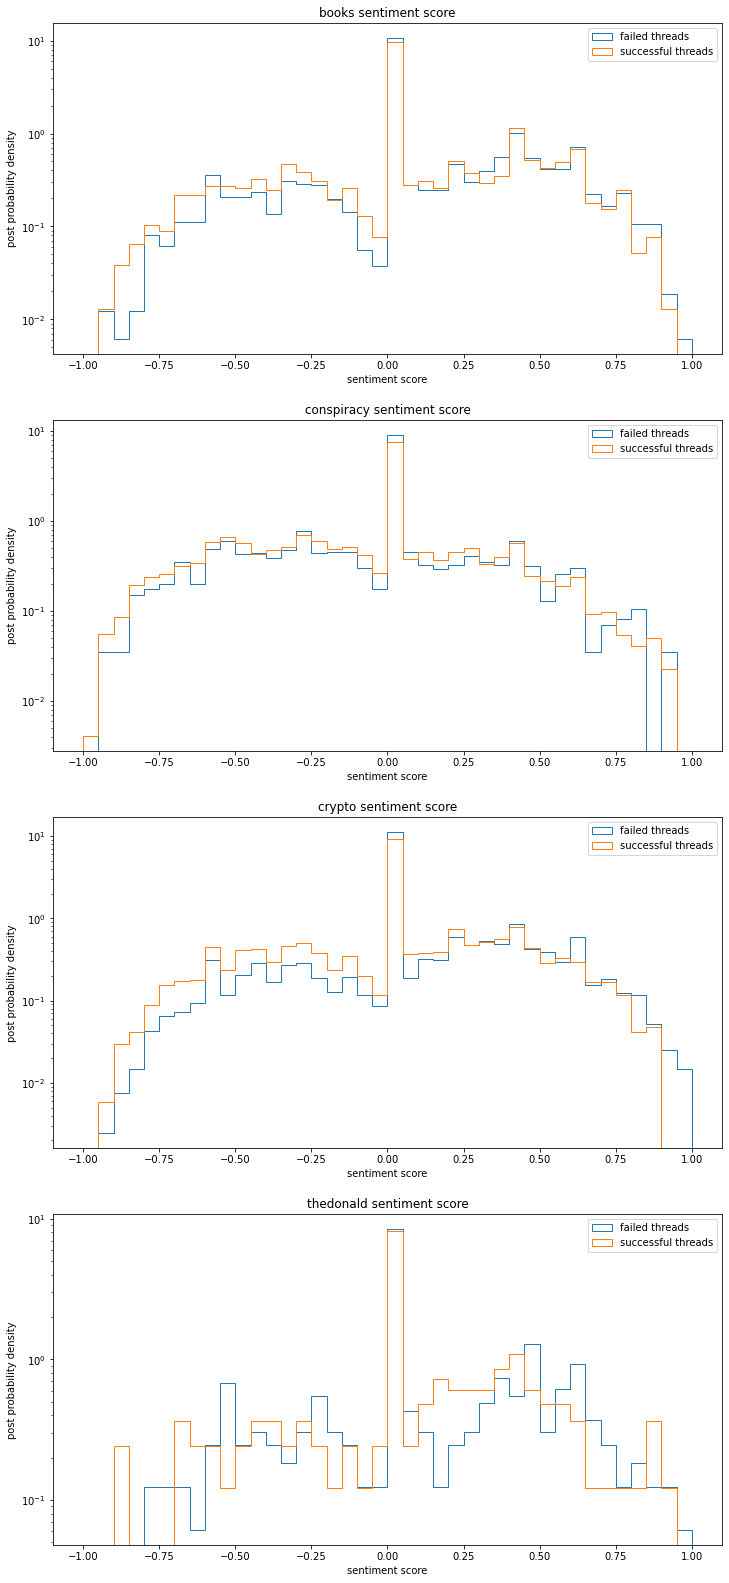

In [42]:

fig, axes = plt.subplots(4,1, figsize=(12,28))
xlabel = 'sentiment score'
ylabel = 'post probability density'
rename_col = 'subject_sentiment_score'


i=0



for key in posts:
    plot_bins = {}
    to_plot = {}
    bin_val = 40
    for name in rename_names:
        to_plot[name] = posts[key][name][rename_col]

        plot_bins[name] = axes[i].hist(
            to_plot[name], bins=bin_val, range=(-1, 1), log=True, density=True, stacked=True,
            histtype='step', label=rename_names[name], color=colours[name]
        )

        bin_val = plot_bins[name][1]

    axes[i].set_title(f'{key} sentiment score')
    axes[i].set_xlabel(xlabel)
    axes[i].set_ylabel(ylabel)
    axes[i].legend()

    i += 1

plt.show()

In [44]:
for key in posts:
    print(f'###{key}###')
    print('2-sided K-S test')
    print(scpstat.ks_2samp(
        posts[key]['success'].subject_sentiment_score,
        posts[key]['fail'].subject_sentiment_score,
        alternative='two-sides'
        ))

###books###
2-sided K-S test
KstestResult(statistic=0.05425158066178597, pvalue=0.003957612293205459)
###conspiracy###
2-sided K-S test
KstestResult(statistic=0.05864341085271318, pvalue=8.282029553996484e-05)
###crypto###
2-sided K-S test
KstestResult(statistic=0.10395885396630557, pvalue=4.7067194100387867e-35)
###thedonald###
2-sided K-S test
KstestResult(statistic=0.07547871351552334, pvalue=0.5275553580808199)


# Mean median sentiment of failed vs successful threads

In [49]:
look_at = ['fail', 'success']
for key in posts:
    print(f'###{key}###')
    for name in look_at:
        print(f'#{name}#')
        display(posts[key][name][['subject_sentiment_score']].describe())

###books###
#fail#


,subject_sentiment_score
count,3219.000000
mean,0.084770
std,0.309465
min,-0.918600
25%,0.000000
50%,0.000000
75%,0.276067
max,0.985900


#success#


,subject_sentiment_score
count,1557.000000
mean,0.058087
std,0.328576
min,-0.918600
25%,0.000000
50%,0.000000
75%,0.248100
max,0.909200


###conspiracy###
#fail#


,subject_sentiment_score
count,1720.000000
mean,-0.049397
std,0.318912
min,-0.943200
25%,-0.226300
50%,0.000000
75%,0.000000
max,0.913600


#success#


,subject_sentiment_score
count,9675.000000
mean,-0.072327
std,0.337043
min,-0.969000
25%,-0.296000
50%,0.000000
75%,0.000000
max,0.945900


###crypto###
#fail#


,subject_sentiment_score
count,8048.000000
mean,0.077023
std,0.285680
min,-0.918500
25%,0.000000
50%,0.000000
75%,0.220200
max,0.979600


#success#


,subject_sentiment_score
count,6770.000000
mean,0.022992
std,0.310779
min,-0.928700
25%,0.000000
50%,0.000000
75%,0.180600
max,0.886000


###thedonald###
#fail#


,subject_sentiment_score
count,326.000000
mean,0.102594
std,0.352886
min,-0.771700
25%,0.000000
50%,0.000000
75%,0.369600
max,0.959000


#success#


,subject_sentiment_score
count,165.000000
mean,0.090682
std,0.342914
min,-0.862500
25%,0.000000
50%,0.000000
75%,0.318450
max,0.906200


In [50]:
for key in posts:
    print(f'###{key}###')
    print('Mann-Whitney U-test')
    print(scpstat.mannwhitneyu(
        posts[key]['success'].subject_sentiment_score,
        posts[key]['fail'].subject_sentiment_score,
        ))
    print('T-test')
    print(scpstat.ttest_ind(
        posts[key]['success'].subject_sentiment_score,
        posts[key]['fail'].subject_sentiment_score,
        equal_var=False))

###books###
Mann-Whitney U-test
MannwhitneyuResult(statistic=2401950.0, pvalue=0.012180969093710841)
T-test
Ttest_indResult(statistic=-2.6804658725399886, pvalue=0.007393317436906768)
###conspiracy###
Mann-Whitney U-test
MannwhitneyuResult(statistic=8022923.0, pvalue=0.014960041985345054)
T-test
Ttest_indResult(statistic=-2.7237506801002884, pvalue=0.0065002778581126144)
###crypto###
Mann-Whitney U-test
MannwhitneyuResult(statistic=24993347.5, pvalue=1.5881516008469245e-20)
T-test
Ttest_indResult(statistic=-10.936530545154378, pvalue=9.998996667670756e-28)
###thedonald###
Mann-Whitney U-test
MannwhitneyuResult(statistic=26863.5, pvalue=0.982723584390356)
T-test
Ttest_indResult(statistic=-0.36004404367686765, pvalue=0.719039109782803)


# Time of Day

In [3]:
#pickle.dump(posts, open('thread_posts.p', 'wb'))
#posts = pickle.load(open('thread_posts.p', 'rb'))

In [4]:
for key in posts:
    for post_type in POST_TYPES:
        posts[key][post_type]['EDT_timestamp'] = reddit.UTC_to_EDT(posts[key][post_type].timestamp)


In [3]:
#pickle.dump(posts, open('thread_posts_EDT.p', 'wb'))
posts = pickle.load(open('thread_posts_EDT.p', 'rb'))

In [4]:
for key in posts:
    for post_type in POST_TYPES:
        posts[key][post_type]['EDT_time'] = posts[key][post_type].EDT_timestamp.apply(reddit.get_time)
        posts[key][post_type]['EDT_hour'] = posts[key][post_type].EDT_timestamp.apply(reddit.get_hour)

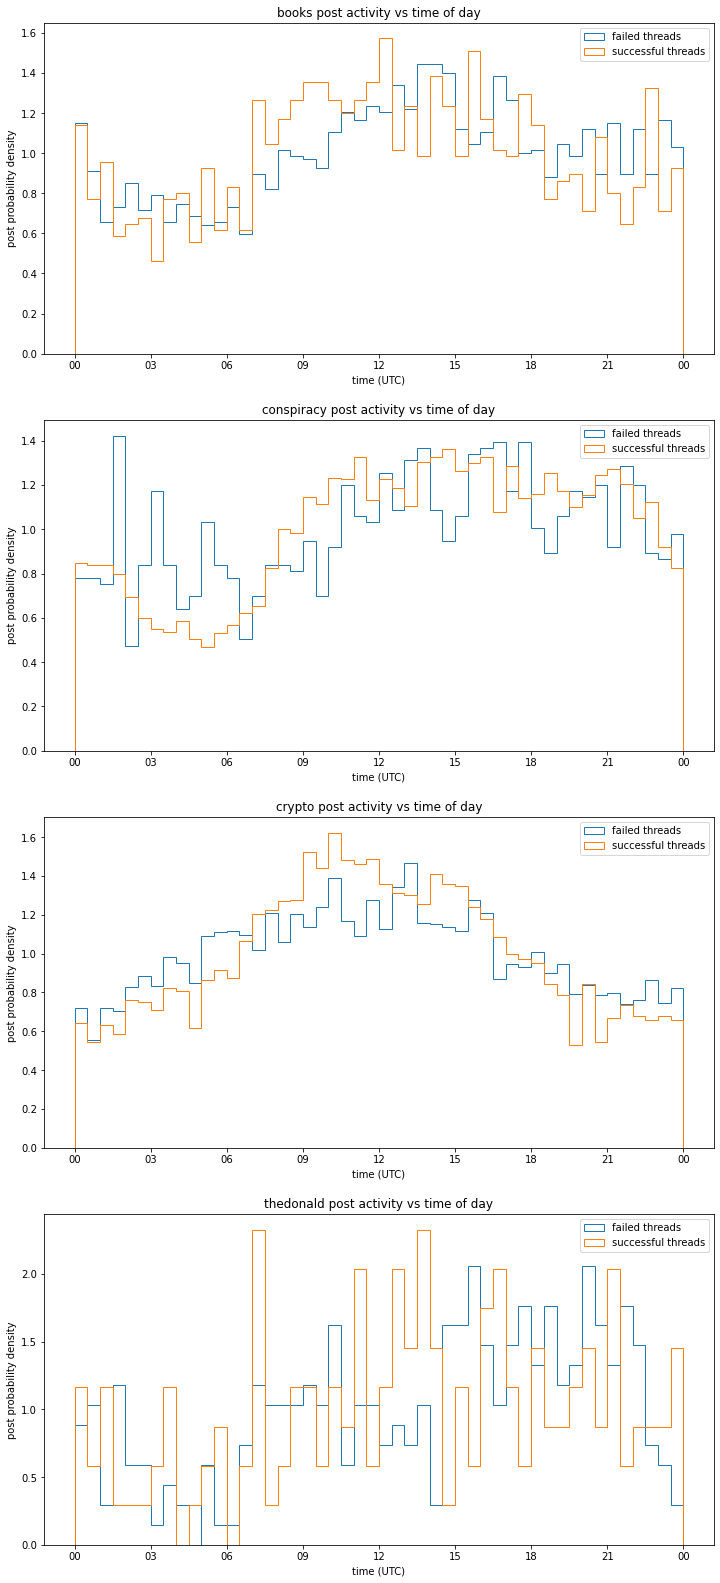

In [41]:
from cProfile import label


fig, axes = plt.subplots(4,1, figsize=(12,28))
col = 'EDT_time'
xlabel = 'time (UTC)'
ylabel = 'post probability density'
hfmt = dates.DateFormatter("%H")

i = 0

dummy_dates = {}

for key in posts:
    dummy_dates[key] = {}
    for post_type in POST_TYPES:
        to_plot = (
            posts[key][post_type][col].apply(
                reddit.conv_to_datetime
                )
            )
        to_plot.rename(
            index=rename_names[post_type]
        ).hist(
            grid=False, bins=48, log=False, ax=axes[i],
            density=True, histtype='step', legend=True,
            range=(
                datetime.datetime(2020, 1, 1, 0),
                datetime.datetime(2020, 1, 1, 23,59,59,59)),
            color=colours[post_type]
        )
        dummy_dates[key][post_type] = to_plot
        
    
    axes[i].set_title(f'{key} post activity vs time of day')
    axes[i].set_xlabel(xlabel)
    axes[i].set_ylabel(ylabel)
    axes[i].xaxis.set_major_formatter(hfmt)
    i += 1





plt.show()

In [22]:
dummy_dates

{'books': {'fail': 0      2020-01-01 20:11:11
  1      2020-01-01 20:27:38
  2      2020-01-01 20:36:53
  3      2020-01-01 21:07:47
  4      2020-01-01 21:44:22
                 ...        
  5155   2020-01-01 19:47:20
  5156   2020-01-01 19:50:57
  5157   2020-01-01 19:56:14
  5158   2020-01-01 19:58:16
  5159   2020-01-01 19:59:16
  Name: EDT_time, Length: 3219, dtype: datetime64[ns],
  'success': 5      2020-01-01 22:00:53
  6      2020-01-01 22:17:55
  12     2020-01-01 00:04:01
  19     2020-01-01 01:52:35
  20     2020-01-01 02:20:28
                 ...        
  5129   2020-01-01 16:14:35
  5138   2020-01-01 17:16:21
  5140   2020-01-01 17:21:52
  5143   2020-01-01 17:39:09
  5153   2020-01-01 19:01:16
  Name: EDT_time, Length: 1557, dtype: datetime64[ns]},
 'conspiracy': {'fail': 2       2020-01-01 20:16:55
  13      2020-01-01 20:55:12
  20      2020-01-01 21:24:21
  25      2020-01-01 21:45:55
  31      2020-01-01 22:16:41
                  ...        
  11418   2020-01-01 

In [31]:
hourly_activity_k_s_test = {}
for key in dummy_dates:
   hourly_activity_k_s_test[key] = scpstat.ks_2samp(
      dummy_dates[key][POST_TYPES[1]], dummy_dates[key][POST_TYPES[0]]
   )

In [32]:
hourly_activity_k_s_test_df = pd.DataFrame.from_dict(hourly_activity_k_s_test)
hourly_activity_k_s_test_df.index = ['statistic', 'p_value']

In [33]:
hourly_activity_k_s_test_df

,books,conspiracy,crypto,thedonald
statistic,0.052045,0.057377,0.041083,0.115784
p_value,0.006489,0.000127,0.000008,0.095883


# Average sentiment over time

## Hourly

In [35]:
def q1(x):
    return x.quantile(0.25)
def q3(x):
    return x.quantile(0.75)

In [38]:
hourly_sentiment = {}
for key in posts:
    hourly_sentiment[key] = {}
    for post_type in POST_TYPES:
        hourly_sentiment[key][post_type] = (
            posts[key][post_type][['EDT_hour', 'subject_sentiment_score']]
            .groupby('EDT_hour')
            .aggregate(func=['mean', 'sem', 'std', q1, 'median', q3, 'max'])
            .reset_index()
        )

In [48]:
hourly_sentiment['books']['success'][('subject_sentiment_score', 'mean')]

0     0.060116
1     0.036344
2     0.113448
3     0.088060
4     0.130894
5     0.042015
6     0.013949
7     0.040259
8     0.069492
9     0.129516
10    0.032556
11    0.051164
12    0.041022
13    0.031469
14    0.037315
15    0.041785
16    0.115592
17    0.058906
18    0.028147
19    0.009047
20    0.019640
21    0.049144
22    0.107729
23    0.057292
Name: (subject_sentiment_score, mean), dtype: float64

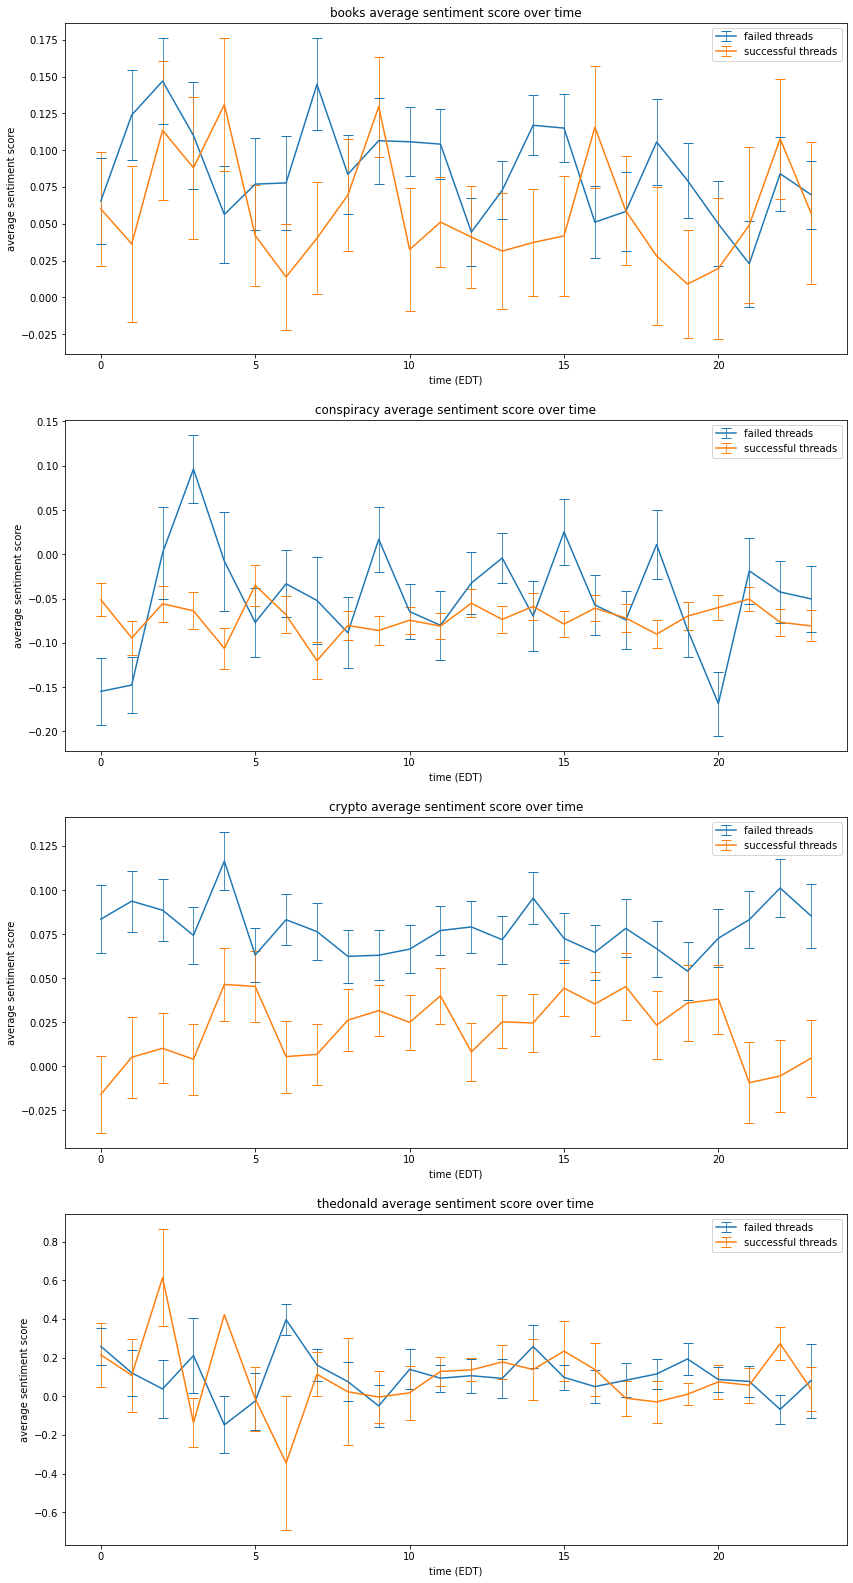

In [50]:
fig, axes = plt.subplots(4, figsize=(14,28))
xcol = 'EDT_hour'
ycol = ('subject_sentiment_score', 'mean')
yerr_col = ('subject_sentiment_score', 'sem')


i = 0

for key in hourly_sentiment:
    for post_type in POST_TYPES:
        axes[i].errorbar(
            hourly_sentiment[key][post_type][xcol],
            hourly_sentiment[key][post_type][ycol],
            yerr=hourly_sentiment[key][post_type][yerr_col],
            elinewidth=0.8, capsize=5,
            label=rename_names[post_type],
            color=colours[post_type]
        )

    axes[i].set_xlabel('time (EDT)')
    axes[i].set_ylabel('average sentiment score')
    axes[i].set_title(f'{key} average sentiment score over time')
    axes[i].legend()

    i+=1
plt.show()

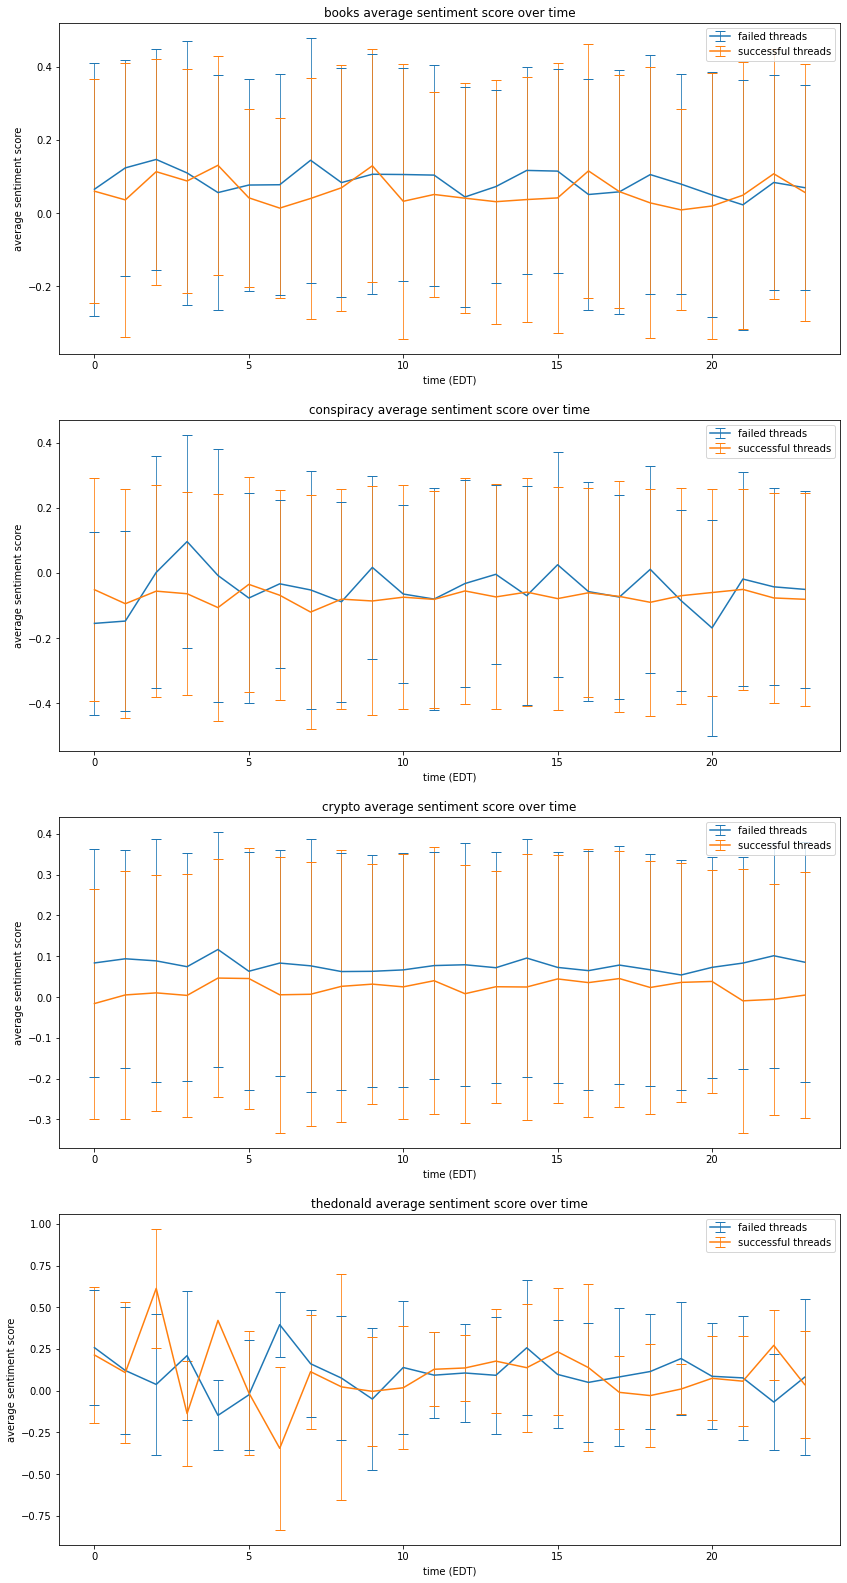

In [51]:
fig, axes = plt.subplots(4, figsize=(14,28))
xcol = 'EDT_hour'
ycol = ('subject_sentiment_score', 'mean')
yerr_col = ('subject_sentiment_score', 'std')


i = 0

for key in hourly_sentiment:
    for post_type in POST_TYPES:
        axes[i].errorbar(
            hourly_sentiment[key][post_type][xcol],
            hourly_sentiment[key][post_type][ycol],
            yerr=hourly_sentiment[key][post_type][yerr_col],
            elinewidth=0.8, capsize=5,
            label=rename_names[post_type],
            color=colours[post_type]
        )

    axes[i].set_xlabel('time (EDT)')
    axes[i].set_ylabel('average sentiment score')
    axes[i].set_title(f'{key} average sentiment score over time')
    axes[i].legend()

    i+=1
plt.show()

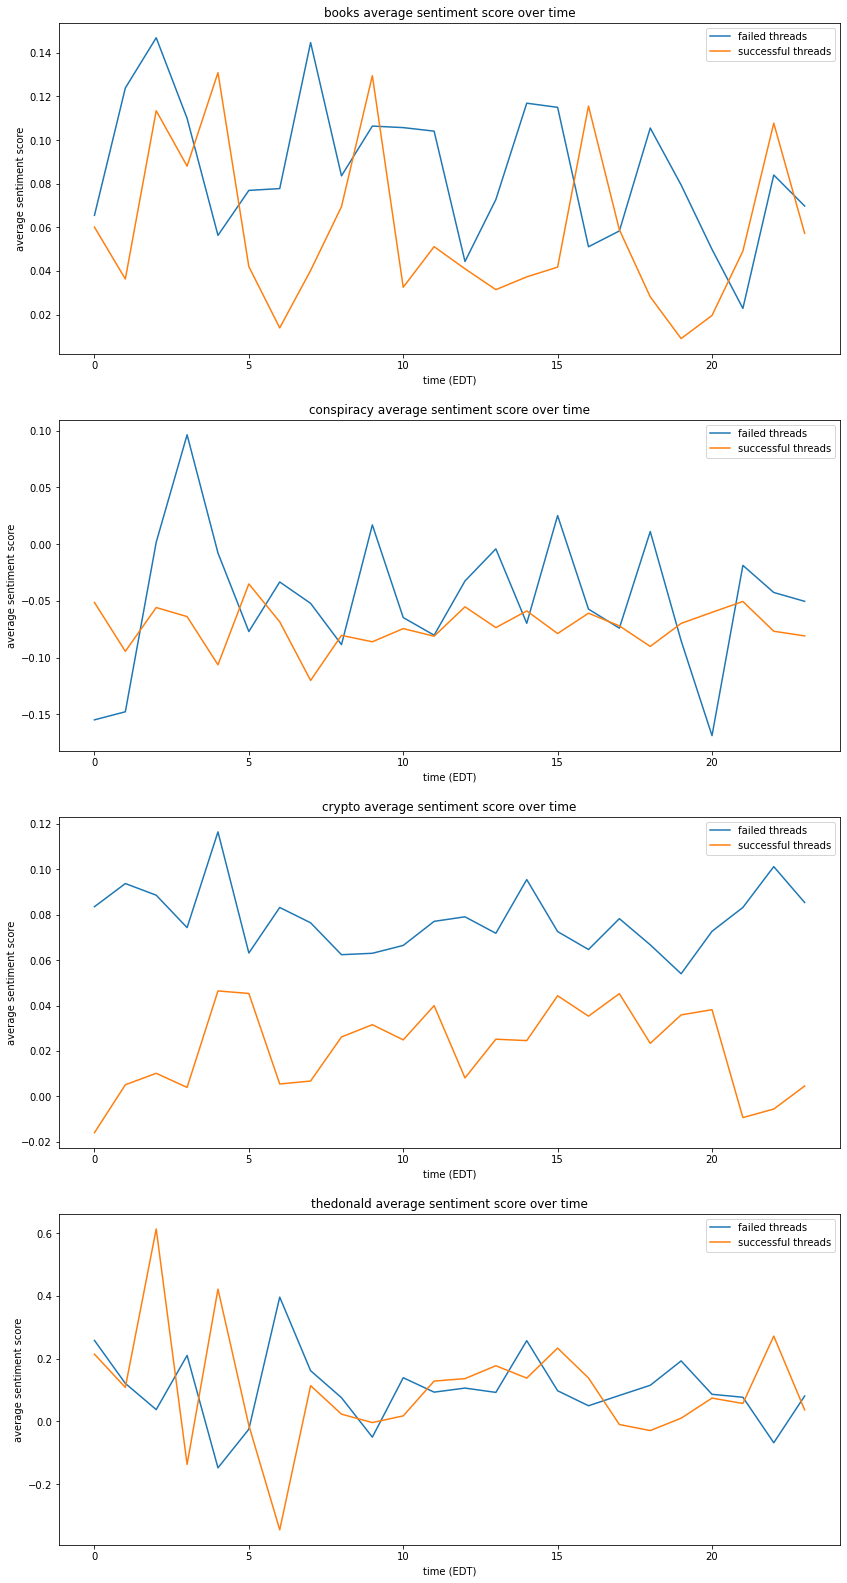

In [52]:
fig, axes = plt.subplots(4, figsize=(14,28))
xcol = 'EDT_hour'
ycol = ('subject_sentiment_score', 'mean')
yerr_col = ('subject_sentiment_score', 'std')


i = 0

for key in hourly_sentiment:
    for post_type in POST_TYPES:
        axes[i].errorbar(
            hourly_sentiment[key][post_type][xcol],
            hourly_sentiment[key][post_type][ycol],
            
            elinewidth=0.8, capsize=5,
            label=rename_names[post_type],
            color=colours[post_type]
        )

    axes[i].set_xlabel('time (EDT)')
    axes[i].set_ylabel('average sentiment score')
    axes[i].set_title(f'{key} average sentiment score over time')
    axes[i].legend()

    i+=1
plt.show()

## Daily

In [3]:
#pickle.dump(posts, open('thread_posts_EDT_times.p', 'wb'))
posts = pickle.load(open('thread_posts_EDT_times.p', 'rb'))

In [4]:
for key in posts:
    for post_type in POST_TYPES:
        posts[key][post_type]['weekday'] = reddit.get_dayofweek(posts[key][post_type]['EDT_timestamp'])

In [6]:
posts['books']['fail']['weekday']

0        F
1        F
2        F
3        F
4        F
        ..
5155    Su
5156    Su
5157    Su
5158    Su
5159    Su
Name: weekday, Length: 3219, dtype: object

In [7]:
pickle.dump(posts, open('thread_posts_EDT_times.p', 'wb'))